<a href="https://colab.research.google.com/github/tanjilmahmud01/Stages-of-Alzheimer-s-Disease-Classification/blob/main/FinalModel_Alzheimers_CSE499A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499ANew/train_test_val/train')
val = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499ANew/train_test_val/val')
test = get_data('/content/drive/MyDrive/Colab Notebooks/CSE499ANew/train_test_val/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


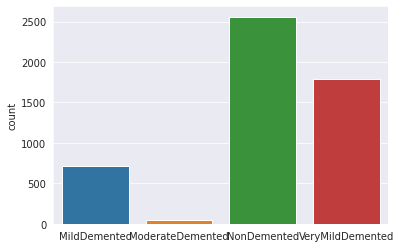

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
      l.append("MildDemented")
    elif(i[1]==1):
      l.append('ModerateDemented')
    elif (i[1]==2):
      l.append('NonDemented')
    else:
        l.append("VeryMildDemented")
sns.set_style('darkgrid')
sns.countplot(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


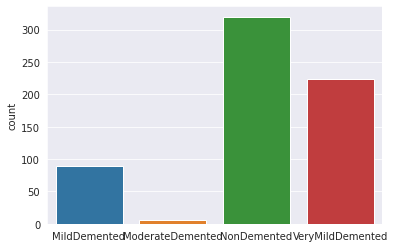

In [ ]:
l = []
for i in val:
    if(i[1] == 0):
      l.append("MildDemented")
    elif(i[1]==1):
      l.append('ModerateDemented')
    elif (i[1]==2):
      l.append('NonDemented')
    else:
        l.append("VeryMildDemented")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'MildDemented')

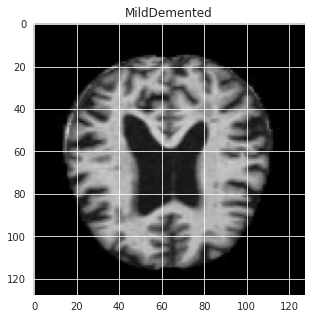

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'VeryMildDemented')

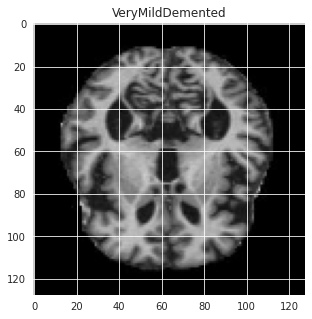

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

x_test=[]
y_test=[]


for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test)/255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
x_train.shape

(5119, 128, 128, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(4, activation="softmax"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 200,batch_size=64 , validation_data = (x_val, y_val))

Epoch 1/200
80/80 [==============================] - 22s 138ms/step - loss: 1.0584 - accuracy: 0.4956 - val_loss: 1.3187 - val_accuracy: 0.5055
Epoch 2/200
80/80 [==============================] - 8s 103ms/step - loss: 0.9702 - accuracy: 0.5376 - val_loss: 1.2983 - val_accuracy: 0.5743
Epoch 3/200
80/80 [==============================] - 8s 104ms/step - loss: 0.9300 - accuracy: 0.5605 - val_loss: 1.2778 - val_accuracy: 0.5086
Epoch 4/200
80/80 [==============================] - 8s 104ms/step - loss: 0.8896 - accuracy: 0.5775 - val_loss: 1.2454 - val_accuracy: 0.4726
Epoch 5/200
80/80 [==============================] - 8s 105ms/step - loss: 0.8693 - accuracy: 0.5886 - val_loss: 1.1074 - val_accuracy: 0.5681
Epoch 6/200
80/80 [==============================] - 8s 104ms/step - loss: 0.8485 - accuracy: 0.6079 - val_loss: 0.9737 - val_accuracy: 0.6369
Epoch 7/200
80/80 [==============================] - 8s 106ms/step - loss: 0.8282 - accuracy: 0.6202 - val_loss: 0.9419 - val_accuracy: 0.632

In [ ]:
scores = model.evaluate(x_test,y_test , verbose=1)

21/21 [==============================] - 1s 23ms/step - loss: 0.0269 - accuracy: 0.9953


In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  99.53271150588989
Loss:  0.026932939887046814


In [ ]:
model.save('model.h5')

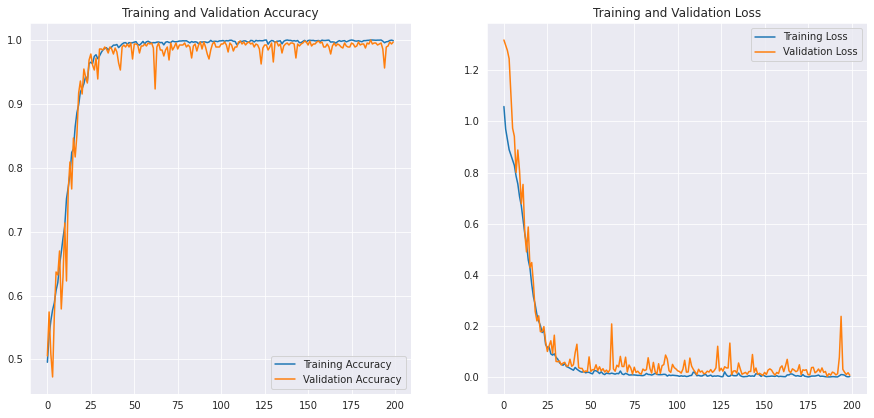

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

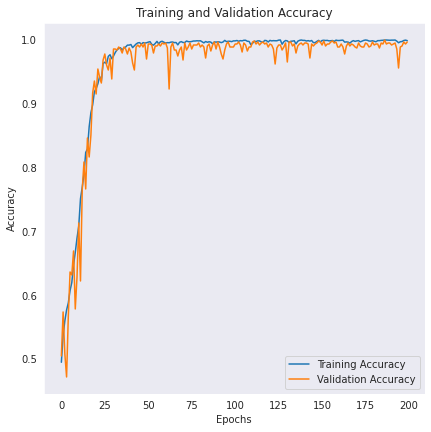

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

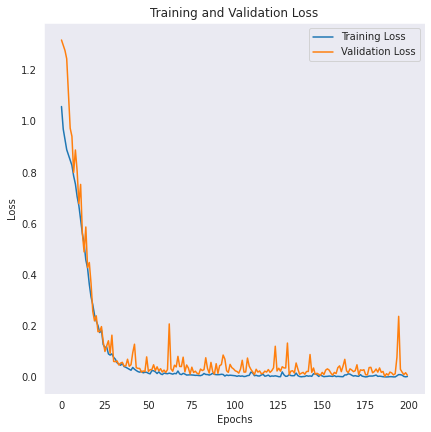

In [ ]:
epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
prediction=model.predict([x_test])

In [ ]:
print(np.argmax(prediction[4]))

0


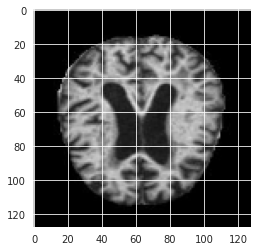

In [ ]:
plt.imshow(x_val[4])
plt.show()

In [ ]:
test_data_dir= '/content/drive/MyDrive/Colab Notebooks/CSE499ANew/train_test_val/test'
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=5
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=False)

Found 642 images belonging to 4 classes.


In [ ]:
train_data_dir='/content/drive/MyDrive/Colab Notebooks/CSE499ANew/train_test_val/train'
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=10
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=True)

Found 5119 images belonging to 4 classes.


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[39]

array([0.47536686, 0.17487772, 0.17487772, 0.17487772], dtype=float32)

In [ ]:
predictions = probability_model.predict(test_generator)

In [ ]:
predictions[39]

array([0.47536686, 0.17487772, 0.17487772, 0.17487772], dtype=float32)

In [ ]:
np.argmax(predictions[39])

0

[394, 430, 41, 265, 523, 497, 414, 310, 488, 366, 597, 223, 516, 142, 288, 143, 97, 633, 256, 545]


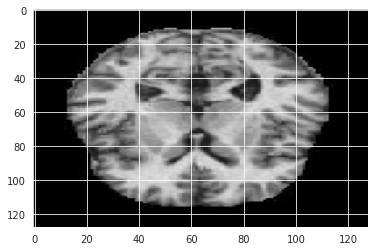

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


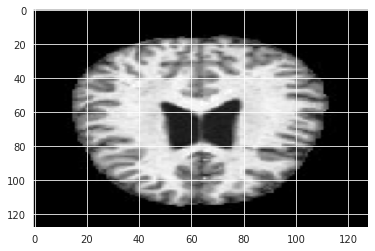

actual label:  VeryMildDemented
predicted label:  VeryMildDemented
predicted: $VeryMildDemented Correctly Classified


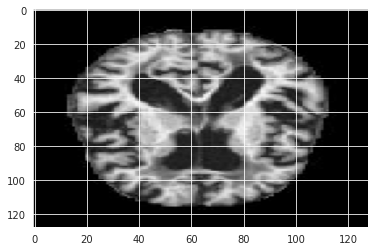

actual label:  MildDemented
predicted label:  MildDemented
predicted: $MildDemented Correctly Classified


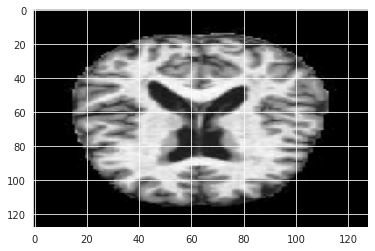

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


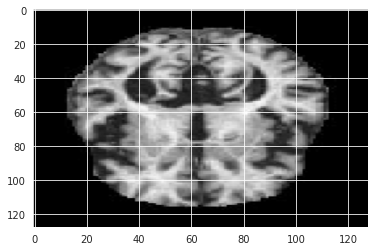

actuala label:  MildDemented
predicted label:  VeryMildDemented
predicted: $MildDemented Mis-classified


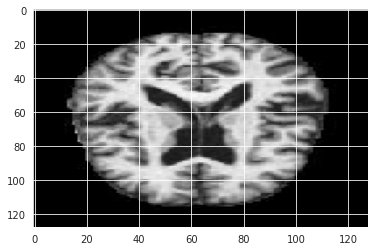

actuala label:  MildDemented
predicted label:  VeryMildDemented
predicted: $MildDemented Mis-classified


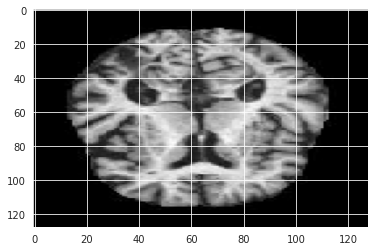

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


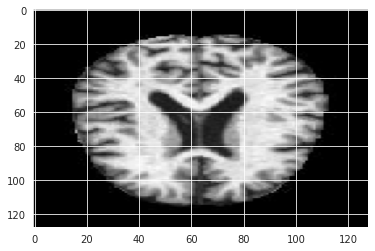

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


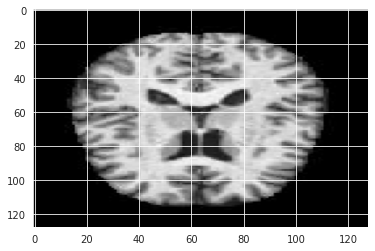

actuala label:  NonDemented
predicted label:  VeryMildDemented
predicted: $NonDemented Mis-classified


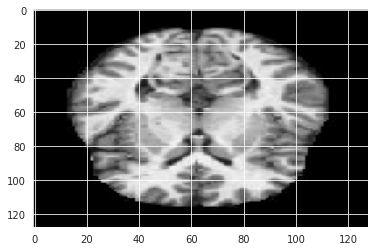

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


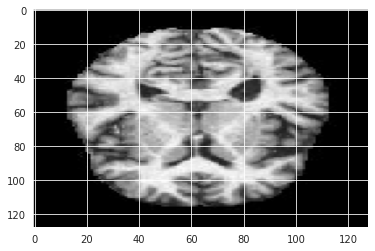

actual label:  VeryMildDemented
predicted label:  VeryMildDemented
predicted: $VeryMildDemented Correctly Classified


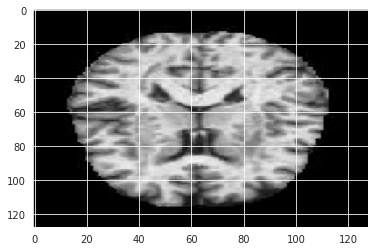

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


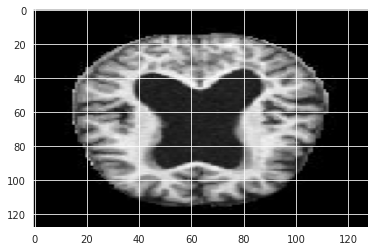

actuala label:  MildDemented
predicted label:  VeryMildDemented
predicted: $MildDemented Mis-classified


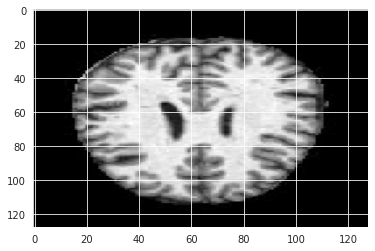

actuala label:  MildDemented
predicted label:  NonDemented
predicted: $MildDemented Mis-classified


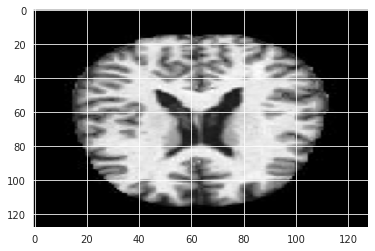

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


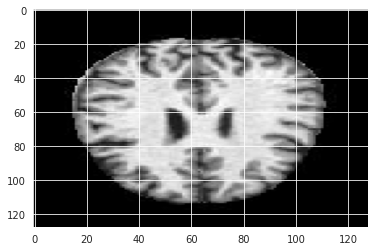

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


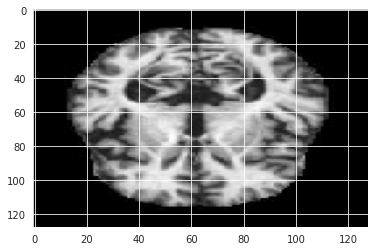

actual label:  ModerateDemented
predicted label:  ModerateDemented
predicted: $ModerateDemented Correctly Classified


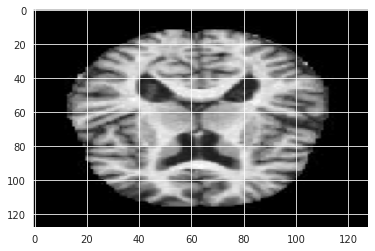

actuala label:  NonDemented
predicted label:  VeryMildDemented
predicted: $NonDemented Mis-classified


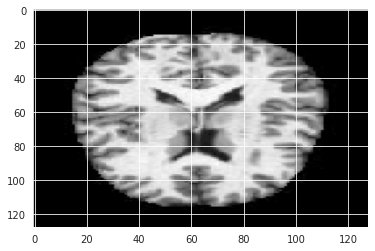

actual label:  NonDemented
predicted label:  NonDemented
predicted: $NonDemented Correctly Classified


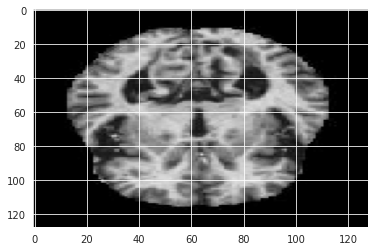

actuala label:  MildDemented
predicted label:  VeryMildDemented
predicted: $MildDemented Mis-classified


In [ ]:
# Plot ten random images and their predictions
random.seed(0)
numbers = [random.randint(0, 641) for i in range(0, 20)]
print(numbers)
actual = test_generator.classes 

predict = np.argmax(model.predict(test_generator),axis =1)


for num in numbers:
   
    for key, value in train_generator.class_indices.items():
        if value == predict[num]:
            key_value = key
    
    plt.imshow(test_generator[num // 5][0][num % 5].astype(np.uint8), aspect='auto')
    plt.show()
    
    if predict[num] == actual[num] :
        print('actual label: ',labels[predict[num]])
        print('predicted label: ',labels[actual[num]])
        print ('predicted: ${} Correctly Classified' .format(key_value))

    else:
        print('actuala label: ',labels[predict[num]])
        print('predicted label: ',labels[actual[num]])
        print ('predicted: ${} Mis-classified'.format(key_value))

Plot Confusion matrix

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecf821e5d0>)

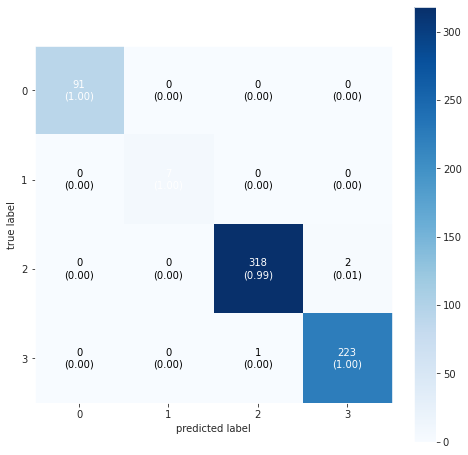

In [ ]:
actual = test_generator.classes
predict = np.argmax(model.predict(x_test),axis =1)
cm=confusion_matrix(actual,predict)
plot_confusion_matrix(cm,figsize=(8,8),
                    colorbar=True,show_normed=True,)

In [ ]:
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00         7
           2       1.00      0.99      1.00       320
           3       0.99      1.00      0.99       224

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [ ]:
print(actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecf821da10>)

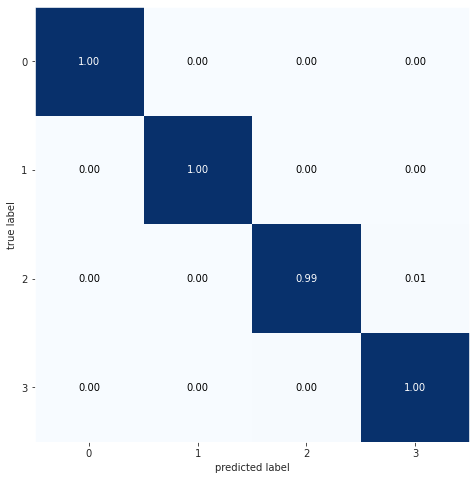

In [ ]:
actual = test_generator.classes
predict = np.argmax(model.predict(x_test),axis =1)
cm=confusion_matrix(actual,predict)
plot_confusion_matrix(cm,figsize=(8,8),
                    colorbar=False,show_absolute=False,show_normed=True,)

In [ ]:
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00         7
           2       1.00      0.99      1.00       320
           3       0.99      1.00      0.99       224

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642

